# Euler Simple 2nd ODE

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Graficar

In [2]:
def graficar(x_values, y_values):
    plt.plot(x_values, y_values,label='Euler modificado')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Solving ODE using Euler's Method")
    plt.legend()
    plt.grid(True)
    plt.show()

## Euler simple

In [3]:
def euler_simp_p(f1,f2,xi,yi,ypi):
    ypend = f1(xi,yi,ypi)
    yppend = f2(xi,yi,ypi)
    return ypend,yppend

## Obtener Valores

In [4]:
def obtenerValores(f1,f2,t0,x0,v0,h,n):
    t_values = np.zeros(n+1);    #x es la var independiente (t)
    x_values = np.zeros(n+1);    #y es la var dependiente (x)
    v_values = np.zeros(n+1);
    t_values[0]=t0  #solo se hacerlo con condiciones iniciales hasta ahora... (no Ec dif con condic de frontera)
    x_values[0]=x0
    v_values[0]=v0
    
    for i in range(1,n+1):
        t_values[i] = t_values[i-1] + h
        ypend,yppend = euler_simp_p(f1,f2,t_values[i-1],x_values[i-1],v_values[i-1])  
        x_values[i] = x_values[i-1] + ypend * h  #no mucho sent...
        v_values[i] = v_values[i-1] + yppend * h
        
        #EULER SIMPLE: Idea/Entendimiento (x_values)     creo asi hice el de fluidos...
        #x_values[i] = x_values[i-1] + v_values[i] * h 
        
        #EULER MEJORADO: Ya vi que si sale! pero CAMBIA toda la dinamica! empiezas por x_values y de ahi calculas v_values!...
    return t_values,x_values,v_values

## Main

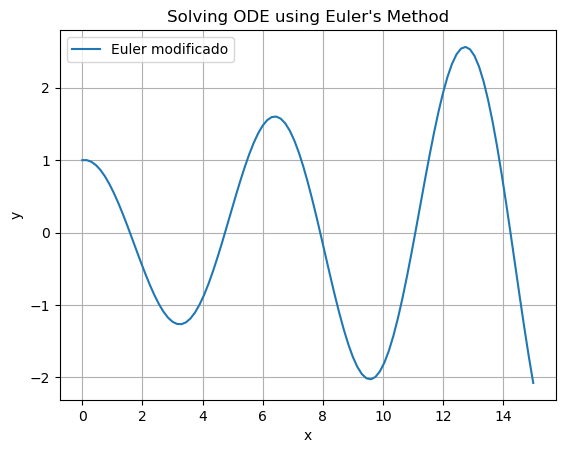

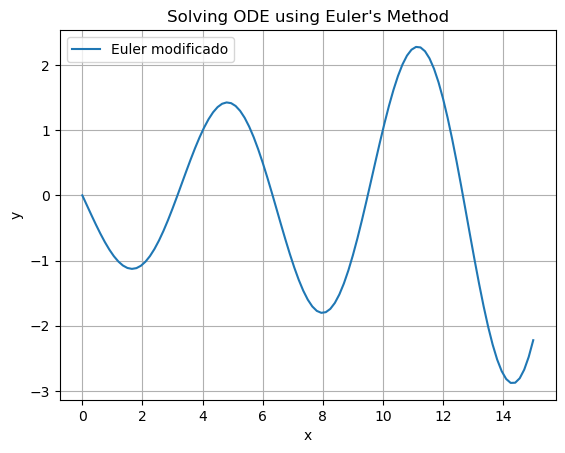

In [6]:
#Valores - Parametros - Condiciones
t0 = 0    #TODAVIA NO SE como resolver SI lo que TENGO son CONDICIONES DE FRONTERA... (solo si se si tengo condic iniciales) 
x0 = 1  
v0 = 0     
k = .2 
m = .2
h = .15
n = 100

#Funcion
def f1(t,x,v):     #x punto = V
    return v
def f2(t,x,v):       #v punto
    return -(k/m)*x


# Resolver
t_values, x_values, v_values = obtenerValores(f1, f2, t0, x0, v0, h, n)  #faltan los v_values... que se vayan guardando (siento que casi solo me enrrende y en realidad si nec primero obt p, aunque no, porque en met mas comp, creo nec mandar x(pos, no t en este caso) de en medio y justo no la tienes!)

# Plot the solution
#label = 'ODE Euler Modificado'
graficar(t_values, x_values)
graficar(t_values, v_values)

## Grafica y Analisis del error (mej)

In [7]:
meanAbsoluteErrorList = []   #solo correrlo al inicio

In [8]:
def valorDeFuncion(x,k,m):
    valor = 5*np.cos(x*np.sqrt(k/m)) #w = sqrt(k/m)
    return valor

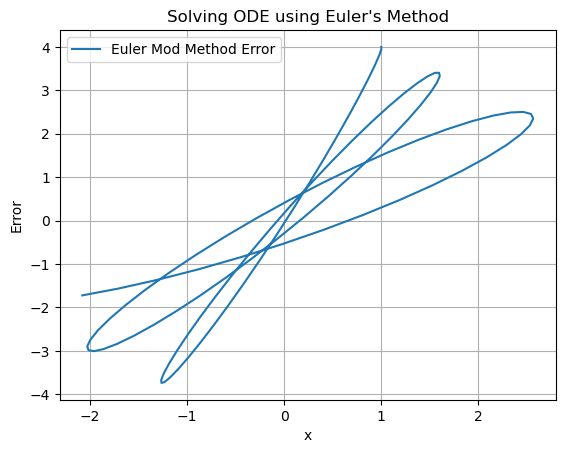

In [9]:
#Grafica del error en func de x
k =.2
m = .2
listRealValues = []
listErrors = []
for i in range (0,n+1):
    #print(x_values[i])
    #print(y_values[i])
    valorReal = valorDeFuncion(t_values[i],k,m)
    listRealValues.append(valorReal)
    listErrors.append(valorReal-x_values[i])
#print(listRealValues)
arrayRealValues = np.array(listRealValues)
#print(arrayRealValues)
arrayErrorValues = np.array(listErrors)
#print(arrayErrorValues)

# Plot the solution
plt.plot(x_values, arrayErrorValues, label='Euler Mod Method Error')
plt.xlabel('x')
plt.ylabel('Error')
plt.title("Solving ODE using Euler's Method")
plt.legend()
plt.grid(True)
plt.show()

#Mean Absolute Error
meanAbsoluteError = np.mean(np.abs(arrayErrorValues))
meanAbsoluteErrorList.append(meanAbsoluteError)



In [10]:
print(meanAbsoluteErrorList)

[2.0078262297286984]


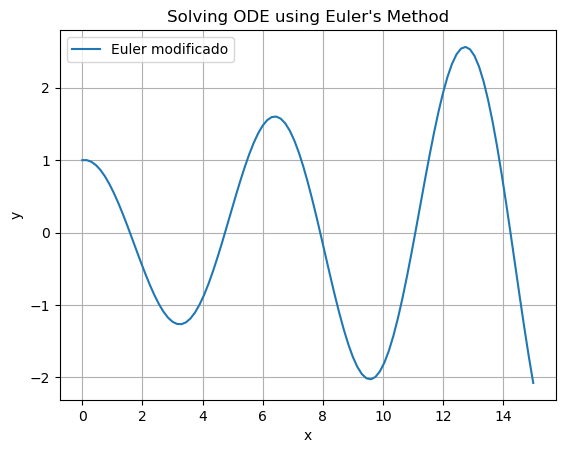

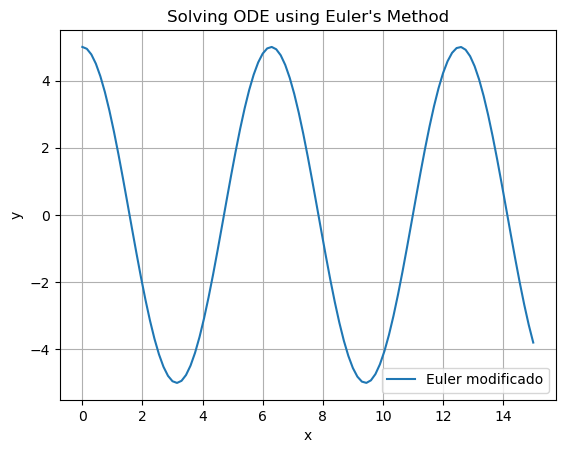

In [11]:
graficar(t_values, x_values)
graficar(t_values, arrayRealValues) #se ve que cada vez crece mas el error! pend mas infinita y menos 1 je!